<pre style = "background-color:red; text-align: center; padding: 20px;border-radius: 30px " >
🛩️🚒CIFAR-10 CNN Architecture🐸🏇🏻 - Image Classification

<pre>

CIFAR-10 is a labeled image classification dataset used to trian and evaluate computer vision models.

>> It answers one basic question:

""Given this image, which object category does it belong to?"

<h3 style = "font-weight: bold; color: lime">Inside CIFAR-10</h3>
- It has 60,000 color images.
- Each image is 32x32 pixels
- 3 channels (RGB)

<h4 style = "color: lime">🎌 Train/Test Split</h4>
- 50,000 training images.
- 10,000 test images.

<h4 style="color:lime;"> The 10 classes </h4>
1. Aeroplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

>> So, in CIFAR-10, the 10 refers to 10 object categories. 





## Goal

<pre>

The goal of this task is to build a Convolutional Neural Network (CNN)
to classify images into predefined categories.
This demonstrates understanding of deep learning fundamentals,
CNN architecture, training, and evaluation.



In [ ]:
# --- importing and checking the GPU ---

import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))


2026-01-08 10:16:34.730960: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.20.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import layers, models

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.20.0


In [4]:
# --- Load CIFAR-10 dataset ---

from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Training data shape:  (50000, 32, 32, 3)
Test data shape:  (10000, 32, 32, 3)


In [5]:
class_names  =['Aeroplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

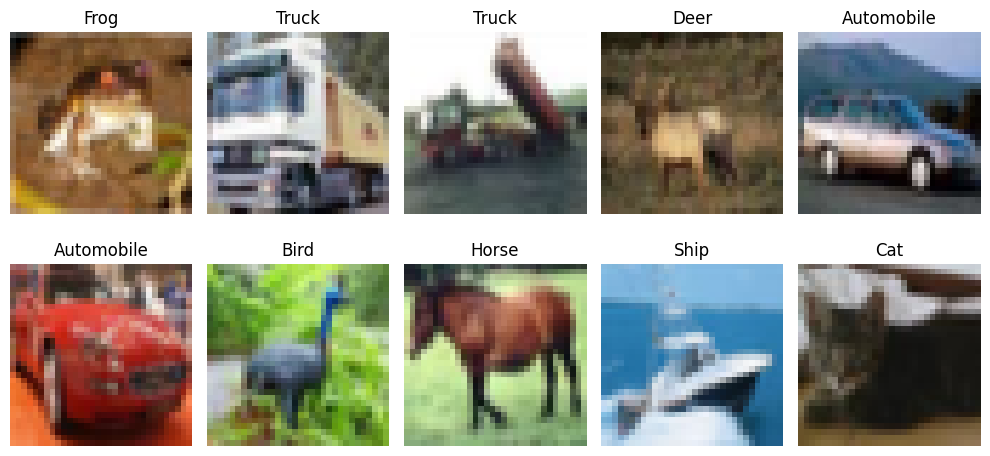

In [6]:
# --- Visualize sample Images ---

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

<pre>

These images looks blurry, and that's because images are 32x32 pixels and that's intentional.

In CIFAR-10:
- Objects are small
- Background clutter exists
- No cropping/ alignment 
- No high resolution detail

>> This forces our model to learn semantics, not pixel memorization!



In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Data Preprocessing

In [ ]:
# --- We will normalize pixel values ---


X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0



In [9]:
# --- One Hot Encode labels ---

y_train_cat = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)

print("Encoded Label shape: ", y_train_cat.shape)

Encoded Label shape:  (50000, 10)


In [ ]:
# --- We will build our CNN model now ---

model_1 = models.Sequential([
    
    # Convolution Block 1
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)), 
    layers.MaxPooling2D((2, 2)), 

    # Convolution Block 2
    layers.Conv2D(64, (3, 3), activation = 'relu'), 
    layers.MaxPooling2D((2, 2)), 

    # Classification Head
    layers.Flatten(), 
    layers.Dense(128, activation = 'relu'), 
    layers.Dense(10, activation = 'softmax')
])

/home/ashi4evr1/Projects/Deep_Learning/dl_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1767867432.938966   83969 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


In [11]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# --- Now, we will compile the model ---

model_1.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [13]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
# --- Let's train our CNN now ---

history = model_1.fit(
    X_train, 
    y_train_cat, 
    epochs = 15, 
    batch_size = 64, 
    validation_split = 0.2, # to monitor generalization we will use validation split here
    verbose = 1
)

2026-01-08 10:17:24.951213: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 491520000 exceeds 10% of free system memory.
2026-01-08 10:17:25.557703: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/15


2026-01-08 10:17:28.099927: I external/local_xla/xla/service/service.cc:163] XLA service 0x7651500089e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-08 10:17:28.099998: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2026-01-08 10:17:28.183955: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-08 10:17:28.774503: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700
2026-01-08 10:17:29.542311: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[64,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn

 17/625 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1200 - loss: 2.2753 

I0000 00:00:1767867452.551793   84042 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3718 - loss: 1.7282

2026-01-08 10:17:39.685164: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[64,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2026-01-08 10:17:39.737514: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[64,64,13,13]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,32,15,15]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationFor

625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.4567 - loss: 1.5169 - val_accuracy: 0.5538 - val_loss: 1.2784
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5940 - loss: 1.1615 - val_accuracy: 0.6153 - val_loss: 1.1015
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6456 - loss: 1.0129 - val_accuracy: 0.6490 - val_loss: 1.0211
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6799 - loss: 0.9204 - val_accuracy: 0.6635 - val_loss: 0.9733
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7043 - loss: 0.8465 - val_accuracy: 0.6645 - val_loss: 0.9660
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7312 - loss: 0.7706 - val_accuracy: 0.6923 - val_loss: 0.9086
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7522 - loss: 0.7119 - val_accuracy: 0.6843 - val_loss: 0.9417
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7744 - loss: 0.6470 - val_accuracy: 0.694

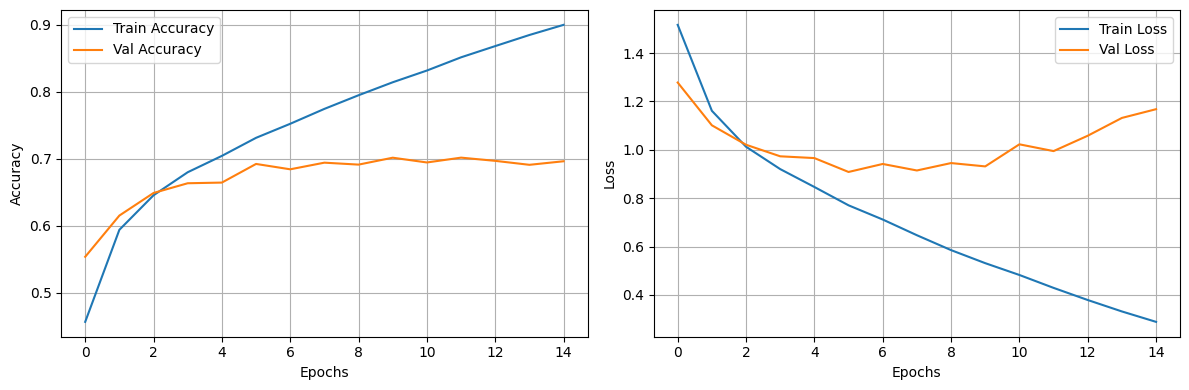

In [16]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
test_loss, test_accuracy = model_1.evaluate(X_test, y_test_cat, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


2026-01-08 10:22:37.116624: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2026-01-08 10:22:37.152996: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,64,13,13]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,15,15]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationFor

Test Accuracy: 0.6771
Test Loss: 1.2096


In [20]:
y_pred_probs = model_1.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

print(classification_report(y_true, y_pred, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

   Aeroplane       0.73      0.69      0.71      1000
  Automobile       0.80      0.79      0.80      1000
        Bird       0.51      0.62      0.56      1000
         Cat       0.48      0.46      0.47      1000
        Deer       0.68      0.58      0.63      1000
         Dog       0.54      0.63      0.58      1000
        Frog       0.80      0.74      0.77      1000
       Horse       0.79      0.68      0.73      1000
        Ship       0.75      0.81      0.78      1000
       Truck       0.75      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



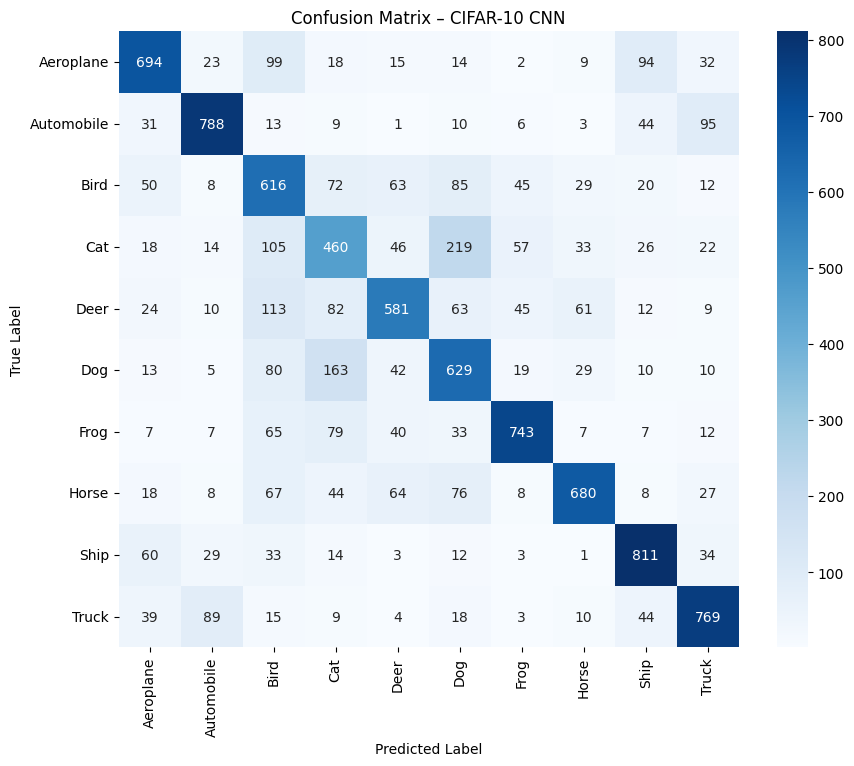

In [21]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – CIFAR-10 CNN')
plt.show()


<pre>

Accuracy is less in this one, let's try another model and we will implement the same things



In [22]:
model_2  = models.Sequential([

    layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/home/ashi4evr1/Projects/Deep_Learning/dl_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# --- Now, we will compile the model ---

model_2.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [28]:
from sklearn.model_selection import train_test_split


X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train,
    y_train_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [29]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X_train_new)


In [39]:
history = model_1.fit(
    datagen.flow(X_train_new, y_train_new, batch_size=64),
    epochs=15,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7170 - loss: 0.8314 - val_accuracy: 0.7485 - val_loss: 0.7517
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7376 - loss: 0.7515 - val_accuracy: 0.7554 - val_loss: 0.7224
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7429 - loss: 0.7340 - val_accuracy: 0.7591 - val_loss: 0.7313
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 70ms/step - accuracy: 0.7497 - loss: 0.7183 - val_accuracy: 0.7675 - val_loss: 0.6944
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.7523 - loss: 0.7028 - val_accuracy: 0.7730 - val_loss: 0.6776
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.7569 - loss: 0.6914 - val_accuracy: 0.7678 - val_loss: 0.6837
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.7643 - loss: 0.6751 - val_accuracy: 0.7590 - val_loss: 0.7206
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.7681 - loss: 0.6697 - 

In [40]:
test_loss, test_accuracy = model_1.evaluate(X_test, y_test_cat, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.7584
Test Loss: 0.7407


In [41]:
history_2 = model_2.fit(
    datagen.flow(X_train_new, y_train_new, batch_size=64),
    epochs=15,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7890 - loss: 0.6244 - val_accuracy: 0.8250 - val_loss: 0.4923
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7887 - loss: 0.6235 - val_accuracy: 0.7640 - val_loss: 0.7270
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7896 - loss: 0.6220 - val_accuracy: 0.7915 - val_loss: 0.5993
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7898 - loss: 0.6189 - val_accuracy: 0.8362 - val_loss: 0.4833
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7947 - loss: 0.6072 - val_accuracy: 0.8349 - val_loss: 0.4736
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7970 - loss: 0.6044 - val_accuracy: 0.8184 - val_loss: 0.5429
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.7960 - loss: 0.6050 - val_accuracy: 0.8430 - val_loss: 0.4583
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7965 - loss: 0.5992 - 

In [33]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test_cat, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.6699
Test Loss: 0.9419


In [35]:
# --- We will save model_1 as it have more acuracy ---

import os
os.makedirs("../models", exist_ok = True)

model_1.save("../models/best_model.keras")

<pre style = "color: skyblue">
<h2>Conclusion</h2>

## Data Preprocessing:

- Pixel values are normalized to [0, 1]
- Labels are one-hot encoded
- Training data is split into training and validation sets



## Data Augmentation

- Data augmentation is applied to increase data diversity
  and reduce overfitting by creating transformed versions of images.


  ## Model Architecture

  The CNN consists of:

  - Convolutional layers for feature extraction
  - Batch Normalization for training stability
  - ReLU activation for non-linearity
  - Maxpooling for spatial downsampling 
  - Global average Pooling to reduce parameters
  - Fully connected layers for classification 


  ## Model Compilation 

  - Adam optimizer is used due to adaptive learning rates.
  - Categorical crossentropy is used for multi-class classification.


  ## Model Training

  - The model is trained using augmented data.
  - Validation accuracy is monitored to evaluate generalization.

  ## Model Evaluation 

  - The final evaluation is performed on an unseen test dataset
    to measure true generalization performance.

 ## Results

 - Training and validation accuracy are closely aligned
 - Slight drop in test accuracy indeicates normal generalization gap
 - Data augmentation significantly improved performance


 ## Conclusion

 - A CNN with data augmentation achieves good generalization
   on CIFAR-10, demonstrating solid understanding of CNN fundamentals. 